#Section 1. Theory

#Section 2. Closed Form Linear Regression



> Import Necessary Libraries



In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

> Reading in the Data
>> Randomizing the Data

>> Splitting the data into X and Y vectors

In [8]:
# Read in the data
data = np.genfromtxt('spambase.data', delimiter=',', usecols=(i for i in range(1,58)))
dataMat = np.array(data)
# Set RNG with seed = 0
np.random.seed(0)
np.random.shuffle(dataMat)
# Splitting the data into X and Y vectors
X = dataMat[:, :-1]
Y =  np.reshape(dataMat[:, -1], (-1, 1))


> Train-Test Split on the data

In [9]:
# Split the training and testing sets in a 2:1 ratio
trainX, testX, trainY, testY = tts(X, Y, test_size=0.33, random_state=1, shuffle=False)

> Standardizing the Data using the training data
>> Take the mean and the standard deviation

In [10]:
mean = trainX.mean(axis=0)
std = trainX.std(axis=0, ddof=1)
trainX_std = (trainX - mean) / std
bias = np.ones((trainX_std.shape[0], 1))
x = np.append(bias, trainX_std , axis=1)
y = trainY

In [11]:
def RMSE(thetas, x, y, mean, std):
    x_std = (x - mean) / std
    x = np.append(np.ones((x_std.shape[0], 1)), x_std , axis=1)
    diff = np.array(y - (x @ thetas))
    return np.sqrt((diff ** 2).mean())

In [15]:
eta = 0.01
i = 0
term = 2 ** -23
rmseTest = lambda thetas: RMSE(thetas, x=testX, y=testY, mean=mean, std=std)
thetas = np.random.uniform(-1, 1, (x.shape[1], 1))

rmse_test = [rmseTest(thetas)]
while i < 1500:
  gradient = 2 * x.T @ ((x @ thetas) - y)
  # update thetas by batch gradient descent
  thetas -= eta / trainX.shape[0] * gradient
  rmse_test.append(rmseTest(thetas))
  if np.abs(rmse_test[i+1] - rmse_test[i]) / rmse_test[i] < term:
    break
  i+=1
rmse = rmse_test[min(1_500 , i)]

res = "$y = "
for idx, theta in enumerate(thetas):
  print(f'theta_{idx}: {theta[0]:0.4f}')
  if idx == 0:
    res += f'{theta[0]:= 0.4f}'
  else:
    res += f' {theta[0]:=+0.4f}x_{idx}'
res += "$"
  
print(res)
print(f'RMSE = {rmse:0.4f}')

theta_0: 0.4023
theta_1: -0.0160
theta_2: 0.0202
theta_3: 0.0150
theta_4: 0.0579
theta_5: 0.0425
theta_6: 0.0770
theta_7: 0.0367
theta_8: 0.0136
theta_9: 0.0193
theta_10: 0.0027
theta_11: -0.0272
theta_12: -0.0032
theta_13: 0.0018
theta_14: 0.0045
theta_15: 0.0689
theta_16: 0.0258
theta_17: 0.0329
theta_18: 0.0208
theta_19: 0.0333
theta_20: 0.0577
theta_21: 0.0423
theta_22: 0.0596
theta_23: 0.0352
theta_24: -0.0372
theta_25: -0.0196
theta_26: -0.0369
theta_27: -0.0005
theta_28: -0.0064
theta_29: -0.0179
theta_30: -0.0049
theta_31: 0.0564
theta_32: -0.0236
theta_33: -0.0459
theta_34: -0.0162
theta_35: 0.0016
theta_36: -0.0116
theta_37: -0.0172
theta_38: -0.0070
theta_39: 0.0273
theta_40: -0.0027
theta_41: -0.0268
theta_42: -0.0172
theta_43: -0.0199
theta_44: -0.0333
theta_45: -0.0354
theta_46: -0.0127
theta_47: -0.0158
theta_48: -0.0328
theta_49: -0.0190
theta_50: -0.0061
theta_51: 0.0738
theta_52: 0.0498
theta_53: 0.0112
theta_54: 0.0082
theta_55: 0.0090
theta_56: 0.0500
$y =  0.4023 -

$y = 3275.6667 + 1097.6031x_{1} -259.3279x_{2}$

#Section 4. Gradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [ ]:
# Read in the data
data = np.genfromtxt('x06Simple.csv', delimiter=',', skip_header=1, usecols=(1,2,3))
dataMat = np.array(data)
# Set RNG with seed = 0
np.random.seed(0)
np.random.shuffle(dataMat)
# Splitting the data into X and Y vectors
X = dataMat[:, :-1]
Y =  np.reshape(dataMat[:, -1], (-1, 1))

In [ ]:
trainX, testX, trainY, testY = tts(X, Y, test_size=0.33, random_state=1, shuffle=False)

In [ ]:
mean = trainX.mean(axis=0)
std = trainX.std(axis=0, ddof=1)
trainX_std = (trainX - mean) / std
testX_std = (testX - mean) / std
bias = np.ones((trainX_std.shape[0], 1))
x = np.append(bias, trainX_std , axis=1)
y = trainY

In [ ]:
eta = 0.01
i = 0
term = 2 ** -23
rmseTrain = lambda thetas: RMSE(thetas, x=trainX, y=trainY,  mean=mean, std=std)
rmseTest = lambda thetas: RMSE(thetas, x=testX, y=testY, mean=mean, std=std)
thetas = np.random.uniform(-1, 1, (3, 1))

rmse_test = [rmseTest(thetas)]
rmse_train = [rmseTrain(thetas)]
while i < 1000:
  gradient = 2 * x.T @ ((x @ thetas) - y)
  # update thetas by batch gradient descent
  thetas -= eta / trainX.shape[0] * gradient
  rmse_test.append(rmseTest(thetas))
  rmse_train.append(rmseTrain(thetas))
  if np.abs(rmse_test[i+1] - rmse_test[i]) / rmse_test[i] < term:
    break
  i+=1
rmse = rmse_test[i+1]

res = "$y = "
for idx, theta in enumerate(thetas):
  print(f'theta_{idx}: {theta[0]:0.4f}')
  if idx == 0:
    res += f'{theta[0]:= 0.4f}'
  else:
    res += f' {theta[0]:=+0.4f}x_{idx}'
res += "$"
  
print(res)
print(f'RMSE = {rmse:0.4f}')

theta_0: 3343.2651
theta_1: 1036.6251
theta_2: -295.6675
$y =  3343.2651 +1036.6251x_1 -295.6675x_2$
RMSE = 653.7564


# $y =  3343.2651 +1036.6251x_1 -295.6675x_2$
# RMSE = 653.7564

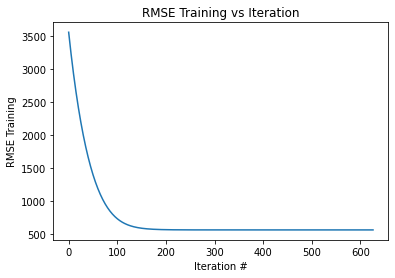

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Iteration #')
plt.ylabel('RMSE Training')
plt.title('RMSE Training vs Iteration')
plt.plot(list(range(len(rmse_train))), rmse_train)
plt.show()

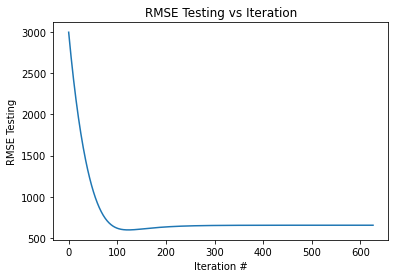

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Iteration #')
plt.ylabel('RMSE Testing')
plt.title('RMSE Testing vs Iteration')
plt.plot(list(range(len(rmse_test))), rmse_test)
plt.show()